In [21]:
# Importation des blibliotheque

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#  Étape 1 – Charger les données

In [22]:
# chargement du dataset
df= pd.read_csv("Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# info sur le dataset
df.info()
df.describe()

# valeur manquante
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#  Étape 2 – Nettoyage des données

In [24]:
# Nettoyage des donnees
# Remplissage des valeurs manquantes
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Suppression des colonnes inutiles
df = df.drop(columns=['Cabin'], errors='ignore')
df = df.drop(columns=['Ticket', 'Name', 'PassengerId'], errors='ignore')


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#  Étape 3 – Analyse exploratoire

In [25]:
# taux de survie global
df['Survived'].value_counts(normalize=True)



Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [26]:
# Taux de survie par sexe
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [27]:
# Taux de survie par classe
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [28]:
# Impact de l'âge sur la survie
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Enfant', 'Adolescent', 'Jeune Adulte', 'Adulte', 'Senior'])
df.groupby('AgeGroup')['Survived'].mean()


/tmp/ipykernel_36750/3858798954.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Enfant          0.579710
Adolescent      0.428571
Jeune Adulte    0.353271
Adulte          0.400000
Senior          0.227273
Name: Survived, dtype: float64

# Étape 4 – Visualisations

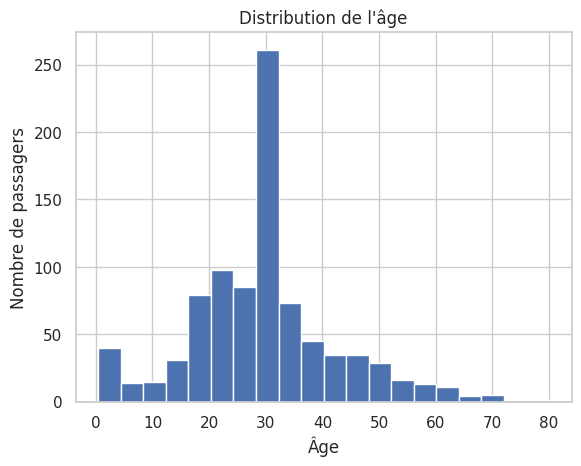

In [29]:
# Histogramme de l'Age
df['Age'].hist(bins=20)
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.show()

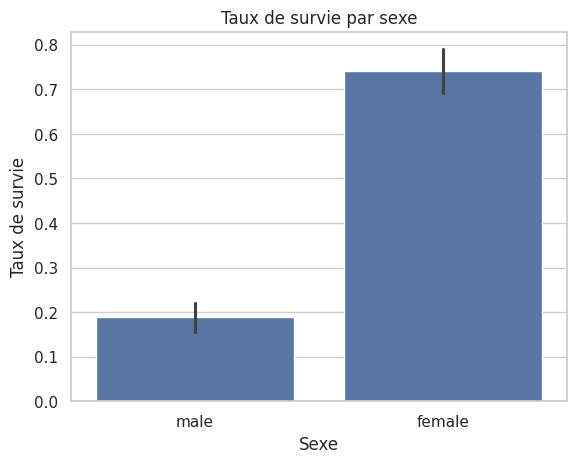

In [31]:
# Taux de survie par sexe

sns.barplot(x=df['Sex'], y=df['Survived'], data=df)
plt.title('Taux de survie par sexe')
plt.xlabel('Sexe')
plt.ylabel('Taux de survie')
plt.show()

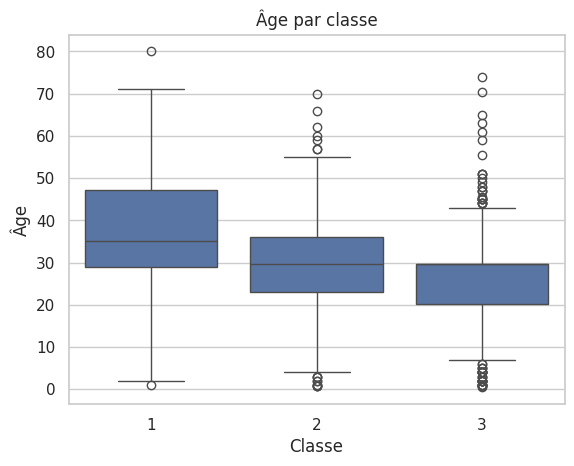

In [32]:
# Boxplot de l'Age par classe
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Âge par classe')
plt.xlabel('Classe')
plt.ylabel('Âge')
plt.show()

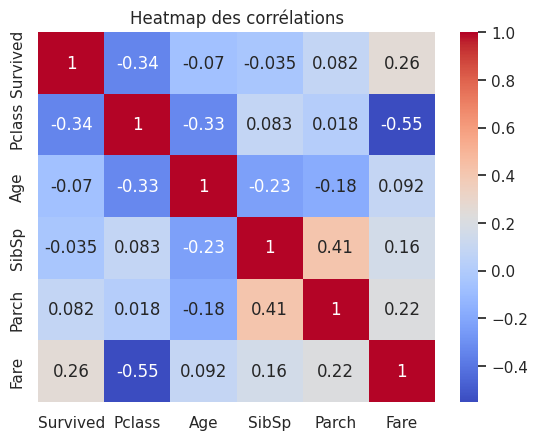

In [34]:
# Heatmap des corrélations (seulement pour les colonnes numériques)
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

In [35]:
df.to_csv("titanic_clean.csv", index=False)
